In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 셀 실행 후 런타임 재시작하고 다시 셀 실행

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

In [ ]:
# font settings - colab
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
PATH1 = '/content/drive/MyDrive/InBig_Project/박기범/data/전주/'
PATH2 = '/content/drive/MyDrive/InBig_Project/심현지/강릉/'
PATH3 = '/content/drive/MyDrive/InBig_Project/이병훈/data_목포_'

# 코로나 데이터 경향성

In [ ]:
jj_corona_all = pd.read_csv(PATH1+'코로나_전주A_일.csv', date_parser=['기준일자'])
jj_corona_35 = pd.read_csv(PATH1+'코로나_전주_일.csv', date_parser=['기준일자'])
gr_corona_all = pd.read_csv(PATH2+'코로나_강릉A_일.csv', date_parser=['기준일자'])
gr_corona_35 = pd.read_csv(PATH2+'코로나_강릉_일.csv', date_parser=['기준일자'])
mp_corona_all = pd.read_csv(PATH3+'코로나/코로나_목포A_일.csv', date_parser=['기준일자']).drop(['Unnamed: 0'], axis=1)
mp_corona_35 = pd.read_csv(PATH3+'코로나/코로나_목포_일.csv', date_parser=['기준일자']).drop(['Unnamed: 0'], axis=1)

In [ ]:
mp_corona_all = mp_corona_all.drop_duplicates(['기준일자'])
mp_corona_35 = mp_corona_35.drop_duplicates(['기준일자'])

In [ ]:
jj_corona_all['기준일자'] = jj_corona_all['기준일자'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
jj_corona_35['기준일자'] = jj_corona_35['기준일자'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
gr_corona_all['기준일자'] = gr_corona_all['기준일자'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
gr_corona_35['기준일자'] = gr_corona_35['기준일자'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
mp_corona_all['기준일자'] = mp_corona_all['기준일자'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
mp_corona_35['기준일자'] = mp_corona_35['기준일자'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

In [ ]:
jj_corona_all.head()

,기준일자,시도명,시군구명,일일확진(명)
0,2020-01-20,전라북도,전주시,0.0
1,2020-01-21,전라북도,전주시,0.0
2,2020-01-22,전라북도,전주시,0.0
3,2020-01-23,전라북도,전주시,0.0
4,2020-01-24,전라북도,전주시,0.0


In [ ]:
gr_corona_all.head()

,기준일자,시도명,시군구명,일일확진(명)
0,2020-01-20,강원도,강릉시,0.0
1,2020-01-21,강원도,강릉시,0.0
2,2020-01-22,강원도,강릉시,0.0
3,2020-01-23,강원도,강릉시,0.0
4,2020-01-24,강원도,강릉시,0.0


In [ ]:
mp_corona_all.tail()

,기준일자,시도명,시군구명,일일확진(명)
554,2021-07-25,전라남도,목포시,2.0
556,2021-07-26,전라남도,목포시,5.0
558,2021-07-27,전라남도,목포시,3.0
560,2021-07-28,전라남도,목포시,3.0
562,2021-07-29,전라남도,목포시,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

jj = jj_corona_all.drop(['기준일자', '시도명', '시군구명'], axis=1)
gr = gr_corona_all.drop(['기준일자', '시도명', '시군구명'], axis=1)
mp = mp_corona_all.drop(['기준일자', '시도명', '시군구명'], axis=1)

scaler = MinMaxScaler()

scaler = scaler.fit(jj)
jj_corona_all['scaled'] = scaler.transform(jj)

scaler = scaler.fit(gr)
gr_corona_all['scaled'] = scaler.fit_transform(gr)

scaler = scaler.fit(mp)
mp_corona_all['scaled'] = scaler.fit_transform(mp)

In [ ]:
corona_all = pd.concat([jj_corona_all, gr_corona_all, mp_corona_all], ignore_index=True)

## 전체 기간 경향성

In [ ]:
corona_all.sample(5)

,기준일자,시도명,시군구명,일일확진(명),scaled
1294,2021-03-23,전라남도,목포시,0.0,0.00
65,2020-03-25,전라북도,전주시,0.0,0.02
930,2021-07-15,강원도,강릉시,0.0,0.00
45,2020-03-05,전라북도,전주시,0.0,0.02
210,2020-09-18,전라북도,전주시,1.0,0.04


In [ ]:
parameters = {'xtick.labelsize': 15,
              'ytick.labelsize':15,
              'axes.labelsize':15}
plt.rcParams.update(parameters)

In [ ]:
corona_all.groupby('시군구명')['scaled'].describe()

,count,mean,std,min,25%,50%,75%,max
시군구명,,,,,,,,
강릉시,473.0,0.034792,0.106676,0.0,0.00,0.00,0.021739,1.0
목포시,473.0,0.021406,0.077006,0.0,0.00,0.00,0.000000,1.0
전주시,472.0,0.055212,0.088842,0.0,0.02,0.02,0.060000,1.0


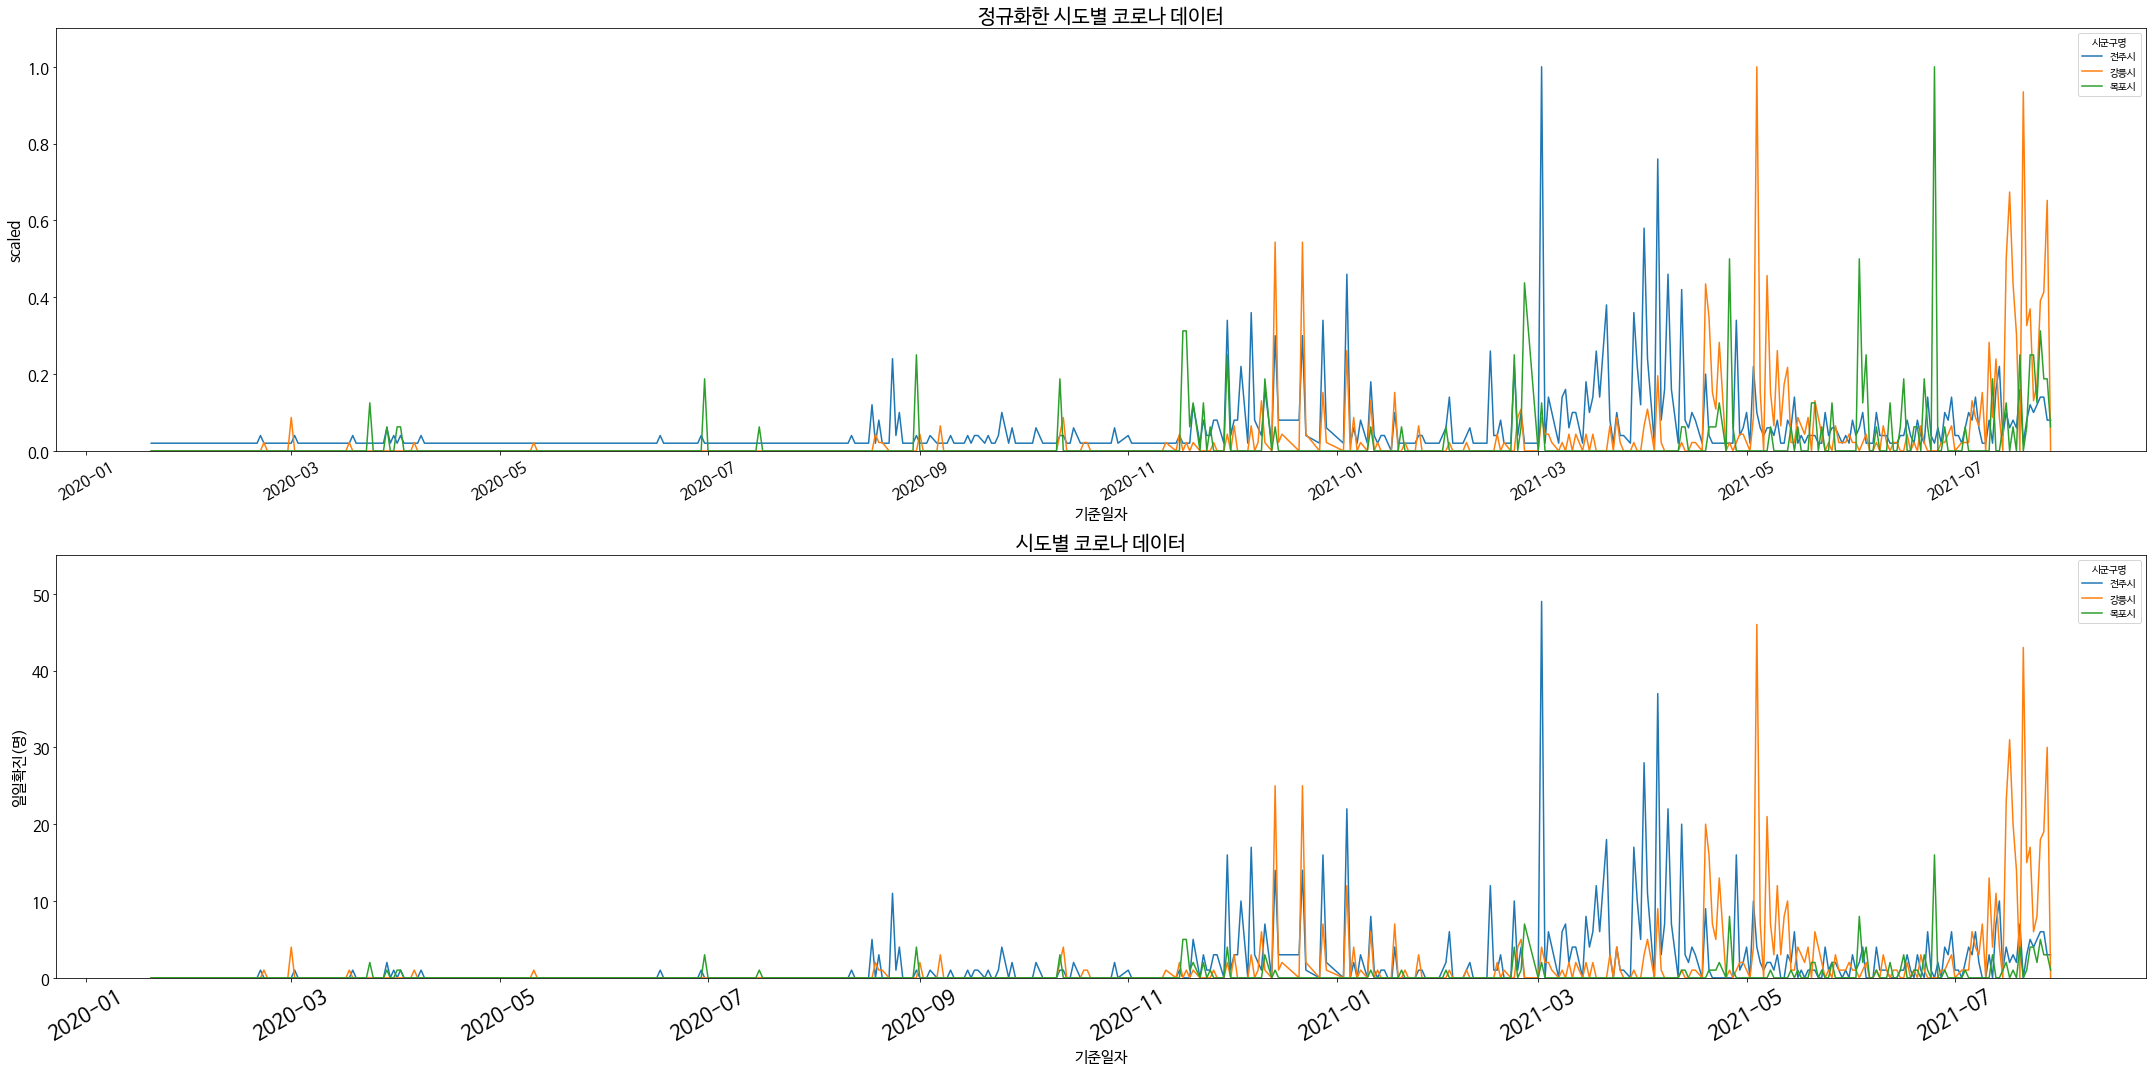

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(30, 15))

g = sns.lineplot(data=corona_all, x='기준일자', y='scaled', hue='시군구명', ax=ax[0])
ax[0].set_title('정규화한 시도별 코로나 데이터', fontsize=20)
ax[0].set_ylim([0.0, 1.1])
ax[0].tick_params(axis='x', rotation=30)

g = sns.lineplot(data=corona_all, x='기준일자', y='일일확진(명)', hue='시군구명', ax=ax[1])
ax[1].set_title('시도별 코로나 데이터', fontsize=20)
ax[1].set_ylim([0, 55])
ax[1].tick_params(axis='x', rotation=30)

plt.xticks(fontsize=20)
fig.tight_layout()
plt.show()

## 3~5월 경향성

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

jj = jj_corona_35.drop(['기준일자', '시도명', '시군구명'], axis=1)
gr = gr_corona_35.drop(['기준일자', '시도명', '시군구명'], axis=1)
mp = mp_corona_35.drop(['기준일자', '시도명', '시군구명'], axis=1)

scaler = MinMaxScaler()

scaler = scaler.fit(jj)
jj_corona_35['scaled'] = scaler.transform(jj)

scaler = scaler.fit(gr)
gr_corona_35['scaled'] = scaler.fit_transform(gr)

scaler = scaler.fit(mp)
mp_corona_35['scaled'] = scaler.fit_transform(mp)

In [ ]:
corona_35 = pd.concat([jj_corona_35, gr_corona_35, mp_corona_35], ignore_index=True)

In [ ]:
corona_35.head()

,기준일자,시도명,시군구명,일일확진(명),scaled
0,2020-03-01,전라북도,전주시,0.0,0.000000
1,2020-03-02,전라북도,전주시,1.0,0.020408
2,2020-03-03,전라북도,전주시,0.0,0.000000
3,2020-03-04,전라북도,전주시,0.0,0.000000
4,2020-03-05,전라북도,전주시,0.0,0.000000


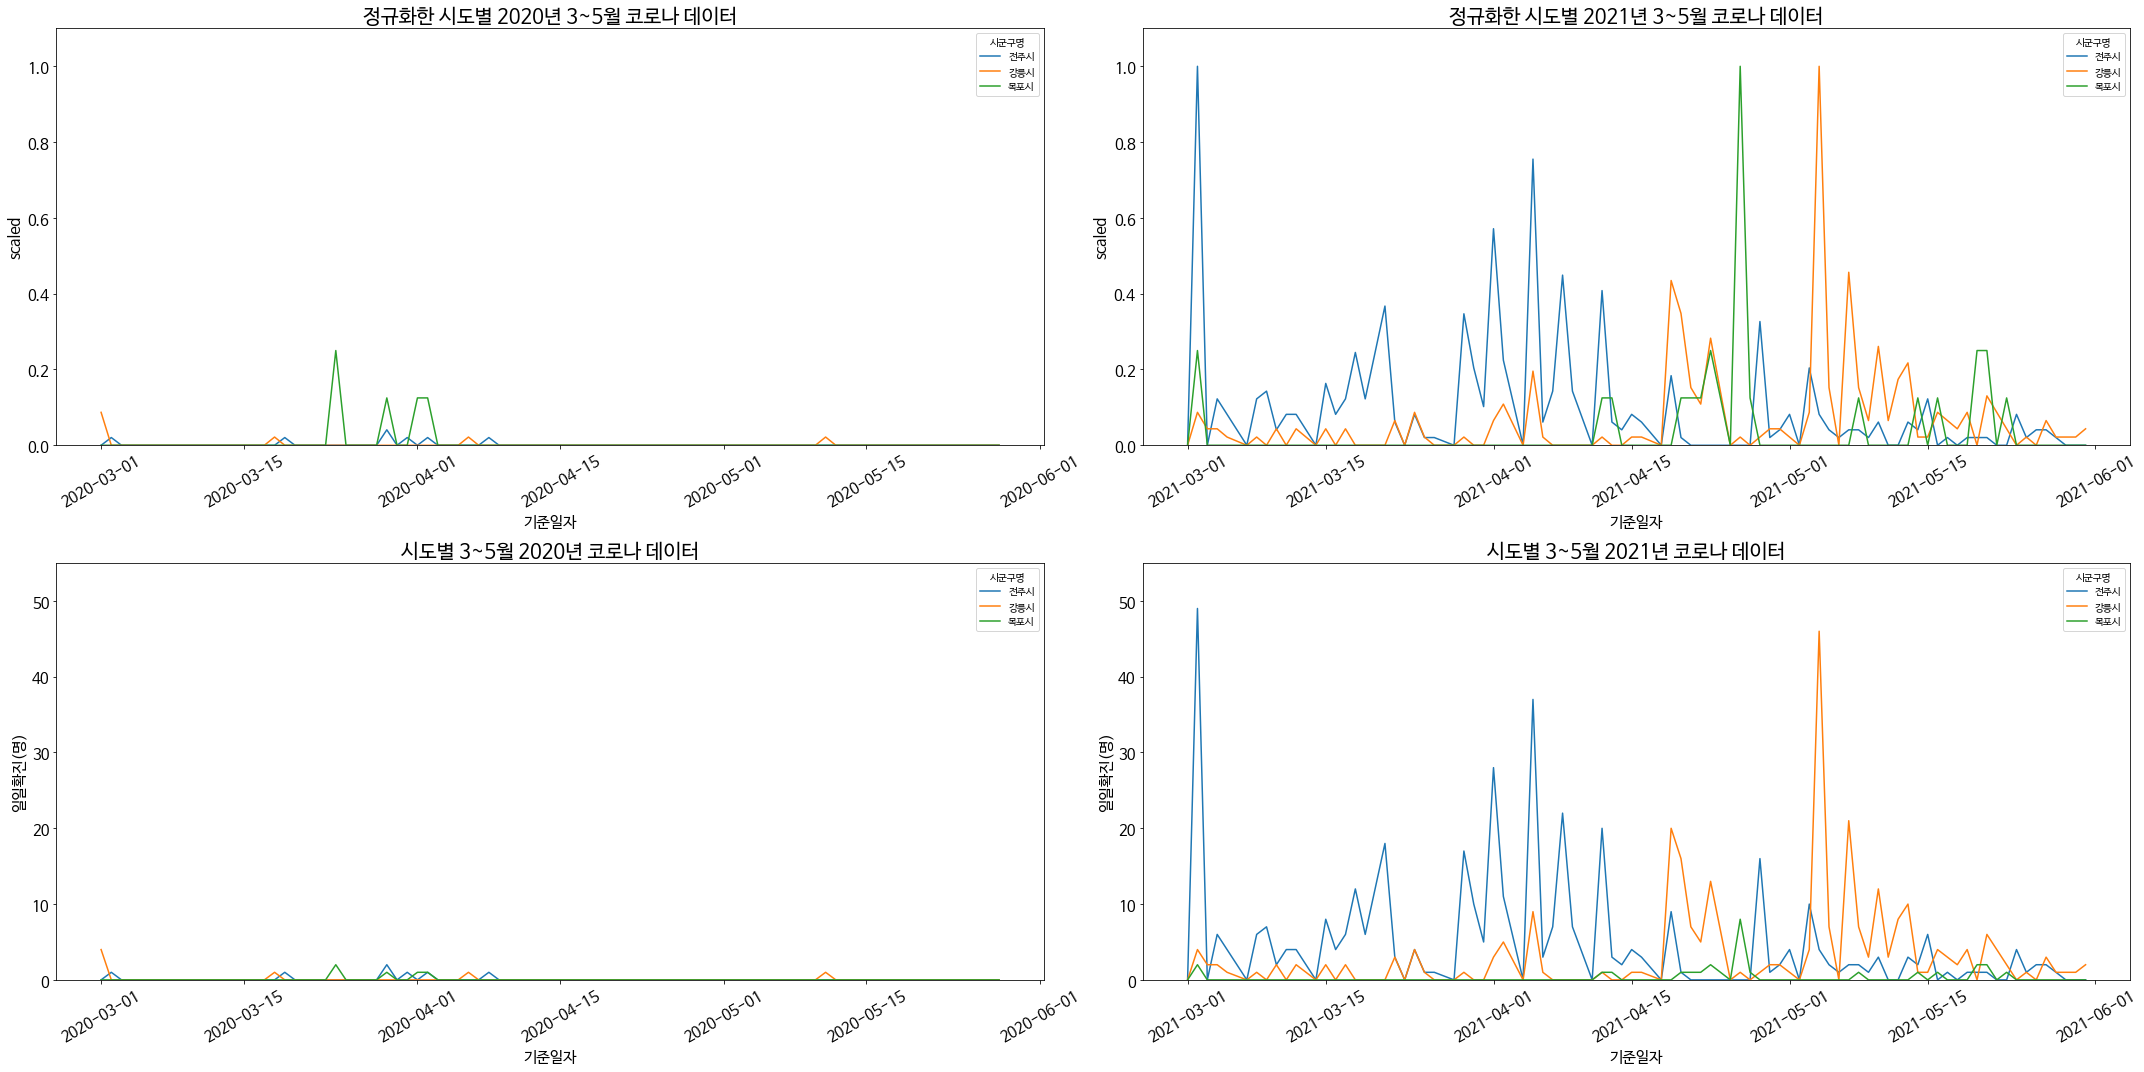

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(30, 15))

sns.lineplot(data=corona_35[corona_35['기준일자'] < '2021'], x='기준일자', y='scaled', hue='시군구명', ax=ax[0][0])
ax[0][0].set_title('정규화한 시도별 2020년 3~5월 코로나 데이터', fontsize=20)
ax[0][0].set_ylim([0.0, 1.1])
ax[0][0].tick_params(axis='x', rotation=30)

sns.lineplot(data=corona_35[corona_35['기준일자'] >= '2021'], x='기준일자', y='scaled', hue='시군구명', ax=ax[0][1])
ax[0][1].set_title('정규화한 시도별 2021년 3~5월 코로나 데이터', fontsize=20)
ax[0][1].set_ylim([0.0, 1.1])
ax[0][1].tick_params(axis='x', rotation=30)

sns.lineplot(data=corona_35[corona_35['기준일자'] < '2021'], x='기준일자', y='일일확진(명)', hue='시군구명', ax=ax[1][0])
ax[1][0].tick_params(axis='x', rotation=30)
ax[1][0].set_ylim([0, 55])
ax[1][0].set_title('시도별 3~5월 2020년 코로나 데이터', fontsize=20)

sns.lineplot(data=corona_35[corona_35['기준일자'] >= '2021'], x='기준일자', y='일일확진(명)', hue='시군구명', ax=ax[1][1])
ax[1][1].tick_params(axis='x', rotation=30)
ax[1][1].set_ylim([0, 55])
ax[1][1].set_title('시도별 3~5월 2021년 코로나 데이터', fontsize=20)

fig.tight_layout()

plt.show()

# 관광객 데이터 경향성

In [ ]:
jj_tourist = pd.read_csv(PATH1+'관광객_전주_일.csv', date_parser='기준일자')
gr_tourist = pd.read_csv(PATH2+'강릉_관광객_일.csv', date_parser='기준일자')
mp_tourist = pd.read_csv(PATH3+'관광객/관광객_목포_일.csv', date_parser='기준일자').drop('Unnamed: 0', axis=1)

In [ ]:
jj_tourist = jj_tourist.rename(columns={'ETL_YMD':'기준일자', 'SIDO_NM':'시도명', 'SGG_NM':'시군구명', 'SUM':'일일관광객(명)'})
gr_tourist = gr_tourist.rename(columns={'ETL_YMD':'기준일자', 'SIDO_NM':'시도명', 'SGG_NM':'시군구명'})

In [ ]:
jj_tourist['기준일자'] = jj_tourist['기준일자'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
gr_tourist['기준일자'] = gr_tourist['기준일자'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d'))
mp_tourist['기준일자'] = mp_tourist['기준일자'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

In [ ]:
jj_tourist = jj_tourist.drop(['O_CNT', 'F_CNT'], axis=1)
jj_tourist.head()

,기준일자,시도명,시군구명,일일관광객(명)
0,2019-03-01,전라북도,전주시,243514
1,2019-03-02,전라북도,전주시,250850
2,2019-03-03,전라북도,전주시,197335
3,2019-03-04,전라북도,전주시,171854
4,2019-03-05,전라북도,전주시,176674


In [ ]:
gr_tourist['일일관광객(명)'] = gr_tourist['O_CNT'] + gr_tourist['F_CNT']

In [ ]:
gr_tourist = gr_tourist.drop(['O_CNT', 'F_CNT'], axis=1)
gr_tourist.head()

,기준일자,시도명,시군구명,일일관광객(명)
0,2019-03-01,강원도,강릉시,179826.0
1,2019-03-02,강원도,강릉시,195600.0
2,2019-03-03,강원도,강릉시,122036.0
3,2019-03-04,강원도,강릉시,63598.0
4,2019-03-05,강원도,강릉시,62444.0


In [ ]:
mp_tourist.head()

,기준일자,시도명,시군구명,일일관광객(명)
0,2019-03-01,전라남도,목포시,77371.0
1,2019-03-02,전라남도,목포시,80479.0
2,2019-03-03,전라남도,목포시,66308.0
3,2019-03-04,전라남도,목포시,51879.0
4,2019-03-05,전라남도,목포시,49055.0


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
scaler = MinMaxScaler()

jj = jj_tourist.drop(['기준일자', '시도명', '시군구명'], axis=1)
gr = gr_tourist.drop(['기준일자', '시도명', '시군구명'], axis=1)
mp = mp_tourist.drop(['기준일자', '시도명', '시군구명'], axis=1)

scaler = scaler.fit(jj)
jj_tourist['scaled'] = scaler.transform(jj)

scaler = scaler.fit(gr)
gr_tourist['scaled'] = scaler.fit_transform(mp)

scaler = scaler.fit(mp)
mp_tourist['scaled'] = scaler.fit_transform(mp)

In [ ]:
tourist = pd.concat([jj_tourist, gr_tourist, mp_tourist], ignore_index=True)

In [ ]:
tourist[tourist['기준일자'] >= '2021']

,기준일자,시도명,시군구명,일일관광객(명),scaled
184,2021-03-01,전라북도,전주시,146045.0,0.271594
185,2021-03-02,전라북도,전주시,150691.0,0.297010
186,2021-03-03,전라북도,전주시,155221.0,0.321791
187,2021-03-04,전라북도,전주시,154323.0,0.316878
188,2021-03-05,전라북도,전주시,175607.0,0.433310
...,...,...,...,...,...
823,2021-05-27,전라남도,목포시,54323.0,0.271144
824,2021-05-28,전라남도,목포시,62398.0,0.376703
825,2021-05-29,전라남도,목포시,81635.0,0.628173
826,2021-05-30,전라남도,목포시,71750.0,0.498954


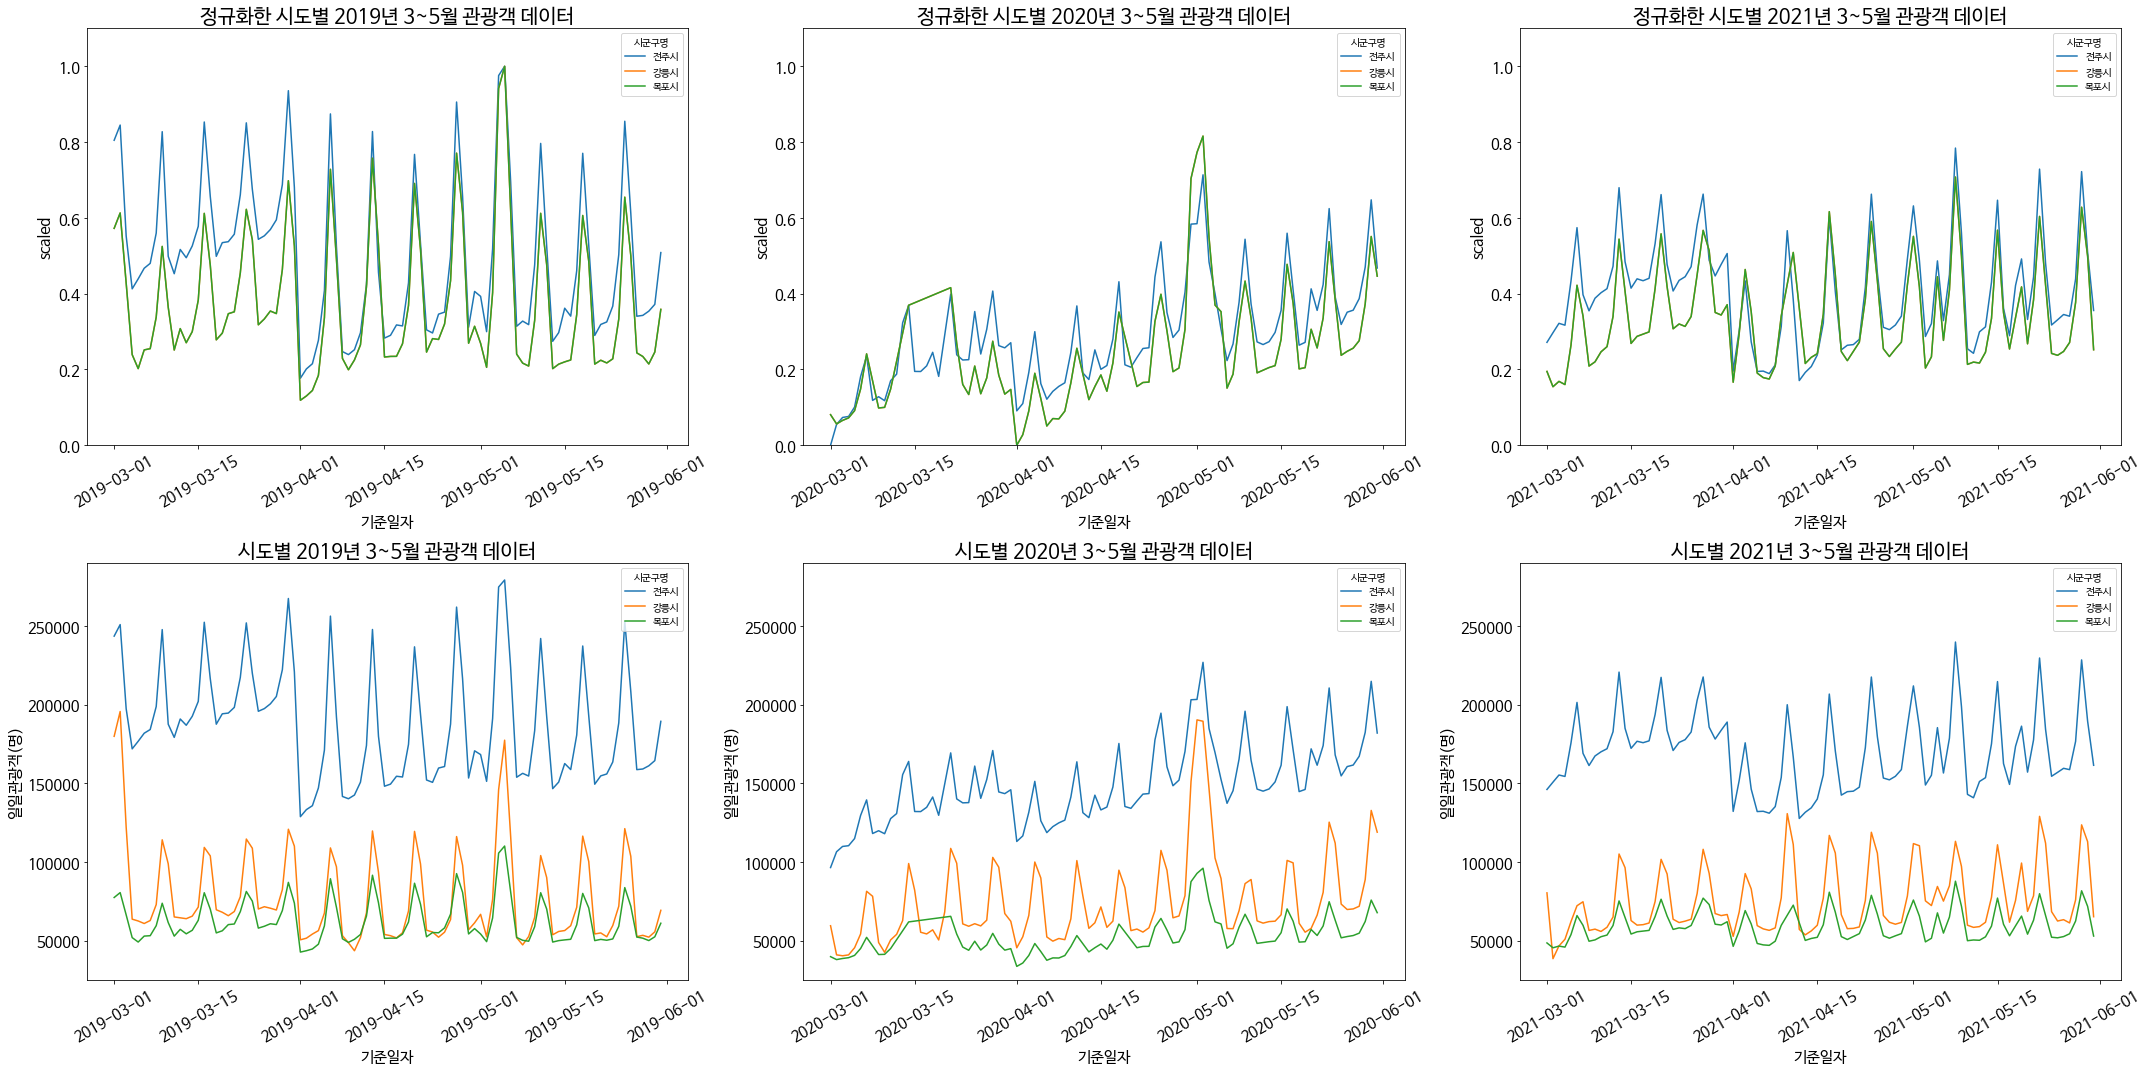

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(30, 15))

g=sns.lineplot(data=tourist[tourist['기준일자'] <= '2020'], x='기준일자', y='scaled', hue='시군구명', ax=ax[0][0])
ax[0][0].set_title('정규화한 시도별 2019년 3~5월 관광객 데이터', fontsize=20)
ax[0][0].tick_params(axis='x', rotation=30)
ax[0][0].set_ylim([0.0, 1.1])

sns.lineplot(data=tourist[(tourist['기준일자'] >= '2020') & (tourist['기준일자'] <= '2021')], x='기준일자', y='scaled', hue='시군구명', ax=ax[0][1])
ax[0][1].set_title('정규화한 시도별 2020년 3~5월 관광객 데이터', fontsize=20)
ax[0][1].tick_params(axis='x', rotation=30)
ax[0][1].set_ylim([0.0, 1.1])

sns.lineplot(data=tourist[tourist['기준일자'] >= '2021'], x='기준일자', y='scaled', hue='시군구명', ax=ax[0][2])
ax[0][2].set_title('정규화한 시도별 2021년 3~5월 관광객 데이터', fontsize=20)
ax[0][2].tick_params(axis='x', rotation=30)
ax[0][2].set_ylim([0.0, 1.1])

sns.lineplot(data=tourist[tourist['기준일자'] <= '2020'], x='기준일자', y='일일관광객(명)', hue='시군구명', ax=ax[1][0])
ax[1][0].set_title('시도별 2019년 3~5월 관광객 데이터', fontsize=20)
ax[1][0].tick_params(axis='x', rotation=30)
ax[1][0].set_ylim([25000, 290000])

sns.lineplot(data=tourist[(tourist['기준일자'] >= '2020') & (tourist['기준일자'] <= '2021')], x='기준일자', y='일일관광객(명)', hue='시군구명', ax=ax[1][1])
ax[1][1].set_title('시도별 2020년 3~5월 관광객 데이터', fontsize=20)
ax[1][1].tick_params(axis='x', rotation=30)
ax[1][1].set_ylim([25000, 290000])

sns.lineplot(data=tourist[tourist['기준일자'] >= '2021'], x='기준일자', y='일일관광객(명)', hue='시군구명', ax=ax[1][2])
ax[1][2].set_title('시도별 2021년 3~5월 관광객 데이터', fontsize=20)
ax[1][2].tick_params(axis='x', rotation=30)
ax[1][2].set_ylim([25000, 290000])

fig.tight_layout()

plt.show()

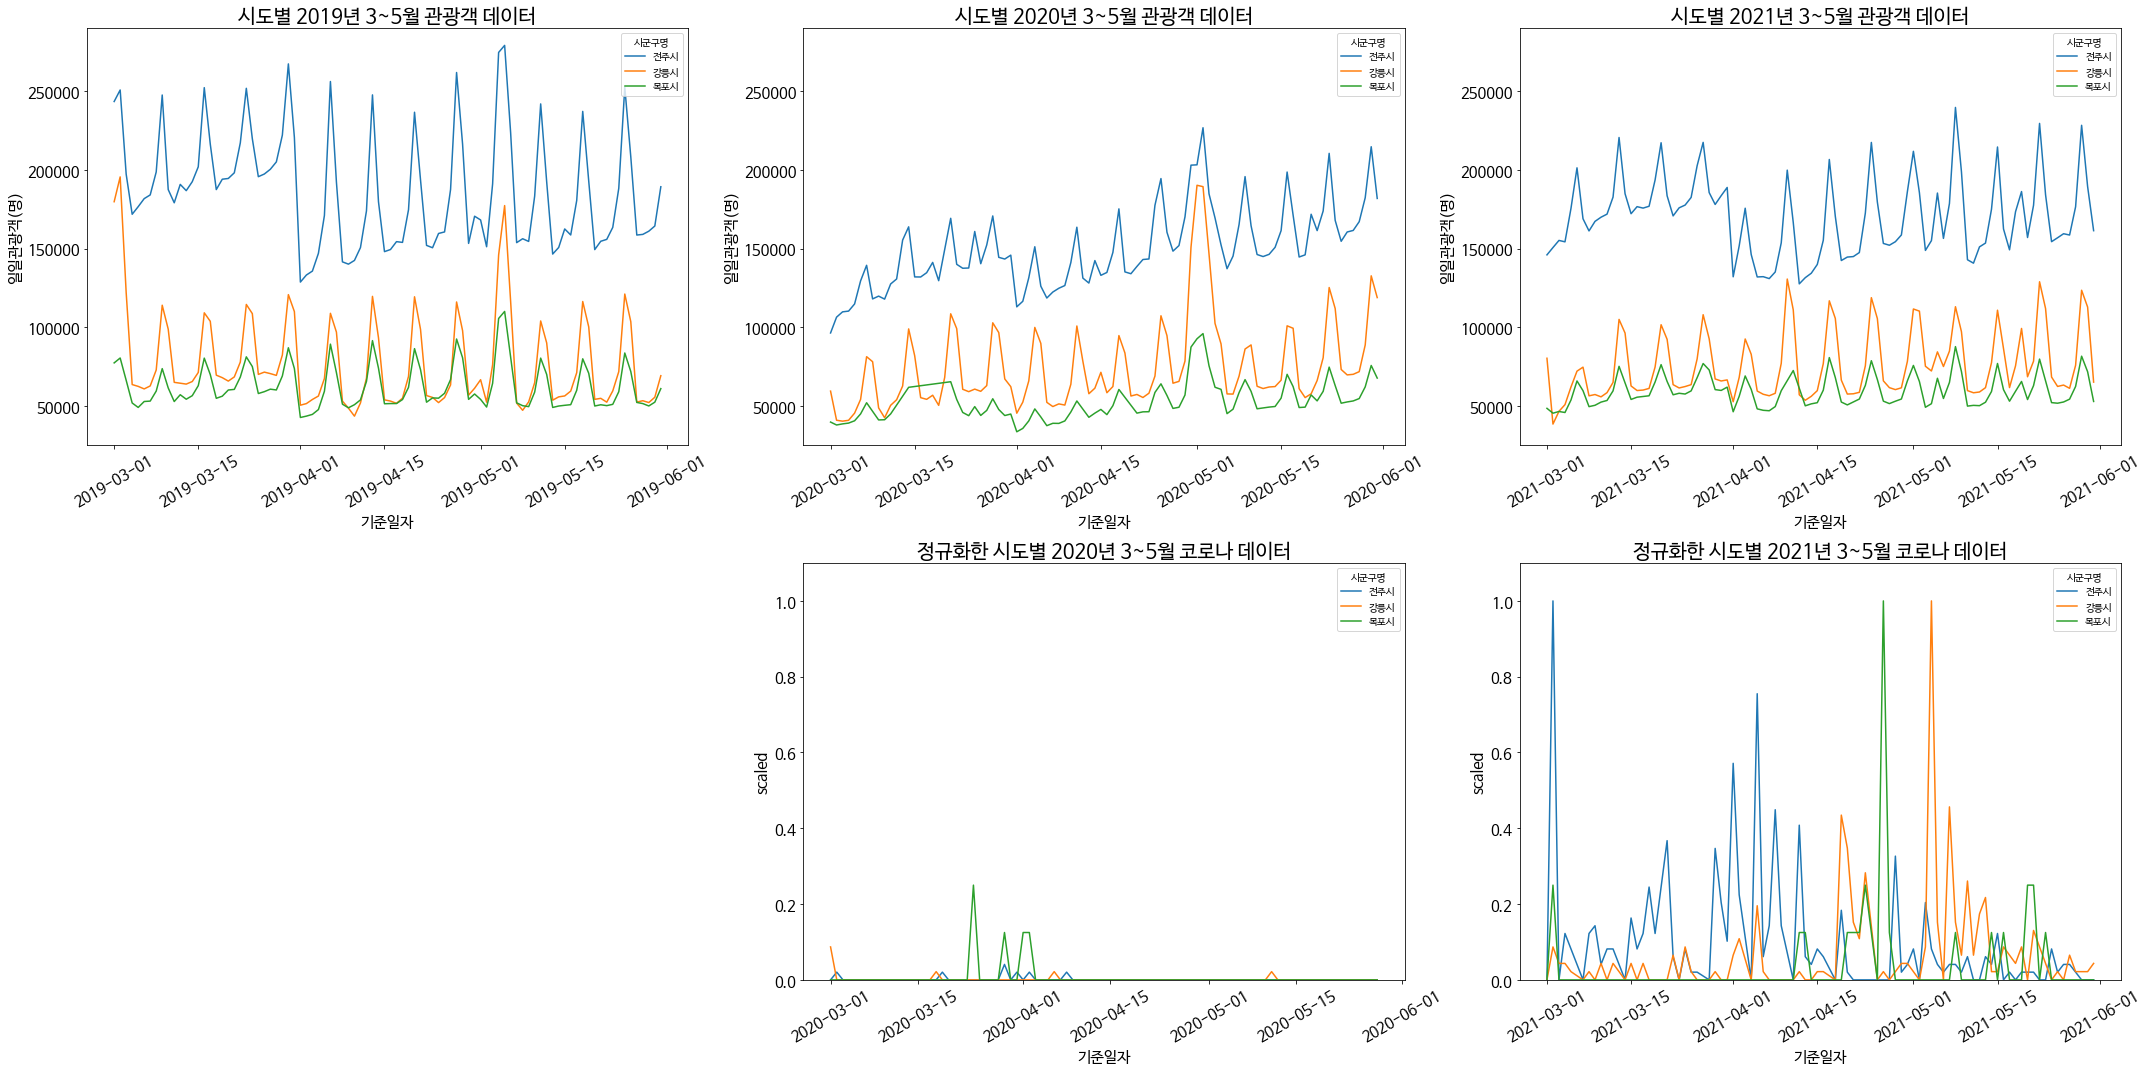

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(30, 15))

g=sns.lineplot(data=tourist[tourist['기준일자'] <= '2020'], x='기준일자', y='일일관광객(명)', hue='시군구명', ax=ax[0][0])
ax[0][0].set_title('시도별 2019년 3~5월 관광객 데이터', fontsize=20)
ax[0][0].tick_params(axis='x', rotation=30)
ax[0][0].set_ylim([25000, 290000])

sns.lineplot(data=tourist[(tourist['기준일자'] >= '2020') & (tourist['기준일자'] <= '2021')], x='기준일자', y='일일관광객(명)', hue='시군구명', ax=ax[0][1])
ax[0][1].set_title('시도별 2020년 3~5월 관광객 데이터', fontsize=20)
ax[0][1].tick_params(axis='x', rotation=30)
ax[0][1].set_ylim([25000, 290000])

sns.lineplot(data=tourist[tourist['기준일자'] >= '2021'], x='기준일자', y='일일관광객(명)', hue='시군구명', ax=ax[0][2])
ax[0][2].set_title('시도별 2021년 3~5월 관광객 데이터', fontsize=20)
ax[0][2].tick_params(axis='x', rotation=30)
ax[0][2].set_ylim([25000, 290000])

sns.lineplot(data=corona_35[corona_35['기준일자'] < '2021'], x='기준일자', y='scaled', hue='시군구명', ax=ax[1][1])
ax[1][1].set_title('정규화한 시도별 2020년 3~5월 코로나 데이터', fontsize=20)
ax[1][1].tick_params(axis='x', rotation=30)
ax[1][1].set_ylim([0.0, 1.1])

sns.lineplot(data=corona_35[corona_35['기준일자'] >= '2021'], x='기준일자', y='scaled', hue='시군구명', ax=ax[1][2])
ax[1][2].set_title('정규화한 시도별 2021년 3~5월 코로나 데이터', fontsize=20)
ax[1][2].tick_params(axis='x', rotation=30)
ax[1][2].set_ylim([0.0, 1.1])

ax.flatten()[-3].axis('off')  

fig.tight_layout()

plt.show()